In [1]:
from multicell_utils.builder import ModelBuilder, ProcessCreator, ObjectCreator

In [2]:
cell_migration = ModelBuilder(model_name="cell_migration")

# add objects
cell_migration.add_object(
    name="universe", 
    object_type="Universe", 
    contained_objects=[
        "environment"
    ]
)
cell_migration.add_object(
    name="environment", 
    object_type="MaterialObjectSpace",
    contained_objects=[
        "single_cell",
        # "external_material"
    ]
)
# cell_migration.add_object(
#     name="external_material",
#     object_type="Material"
# )
cell_migration.add_object(
    name="single_cell",
    object_type="Cell"
)

# add processes
cell_migration.add_process(
    name="motile force",
    process_type="MotileForce",
    participating_objects=["single_cell"]
)

Model saved to models/cell_migration.json


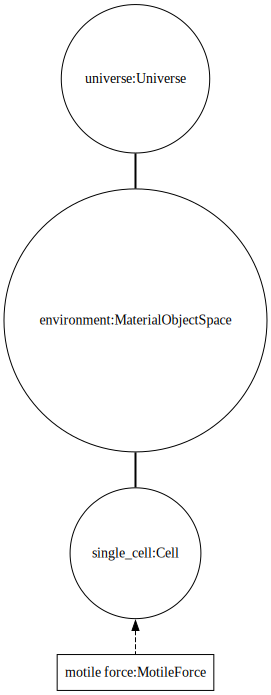

In [3]:
cell_migration.validate()
cell_migration.save(filename='cell_migration.json')
cell_migration.graph()